In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [22]:

base_dir = 'C:/Users/sunny/Downloads/aptos2019-blindness-detection/train_images/train_images'
labels = pd.read_csv('C:/Users/sunny/Downloads/aptos2019-blindness-detection/train_1.csv')

In [1]:
# Class labels
class_labels = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR']


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

base_dir = 'C:/Users/sunny/Downloads/aptos2019-blindness-detection/train_images/train_images'
labels = pd.read_csv('C:/Users/sunny/Downloads/aptos2019-blindness-detection/train_1.csv')

# Preprocess images
def preprocess_image(image_path):
    if not os.path.isfile(image_path):
        image_path = image_path.replace('.png', '.PNG')
        if not os.path.isfile(image_path):
            print(f" WARNING: {image_path} not found!")
            return None
    img = cv2.imread(image_path)
    if img is None:
        print(f" WARNING: Unable to read {image_path}")
        return None
    img = cv2.resize(img, (224, 224))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    coeffs = pywt.dwt2(gray, 'haar')
    cA, (cH, cV, cD) = coeffs
    features = np.hstack([cA.flatten(), cH.flatten(), cV.flatten(), cD.flatten()])
    return features, gray, edges, img

X = []
y = []
gray_images = []
edge_images = []
original_images = []

for index, row in labels.iterrows():
    image_path = os.path.join(base_dir, row['id_code'] + '.png')
    result = preprocess_image(image_path)
    if result is not None:
        features, gray, edges, img = result
        X.append(features)
        y.append(row['diagnosis'])
        gray_images.append(gray)
        edge_images.append(edges)
        original_images.append(img)

X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize and apply PCA for feature reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Train SVM model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [16]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_labels))


Accuracy: 69.97%
[[267   0   8   0   0]
 [  3   0  48   2   0]
 [ 39   0 139   0   0]
 [  8   0  14   4   0]
 [ 11   0  43   0   0]]
                  precision    recall  f1-score   support

           No_DR       0.81      0.97      0.89       275
            Mild       0.00      0.00      0.00        53
        Moderate       0.55      0.78      0.65       178
          Severe       0.67      0.15      0.25        26
Proliferative_DR       0.00      0.00      0.00        54

        accuracy                           0.70       586
       macro avg       0.41      0.38      0.36       586
    weighted avg       0.58      0.70      0.62       586



C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

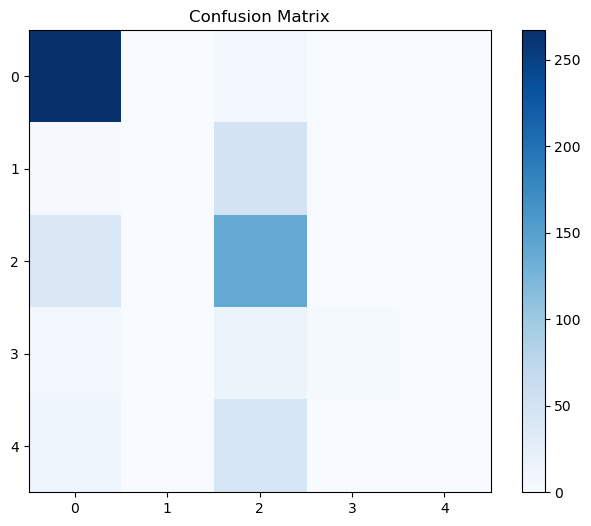

In [17]:
# Visualization of confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


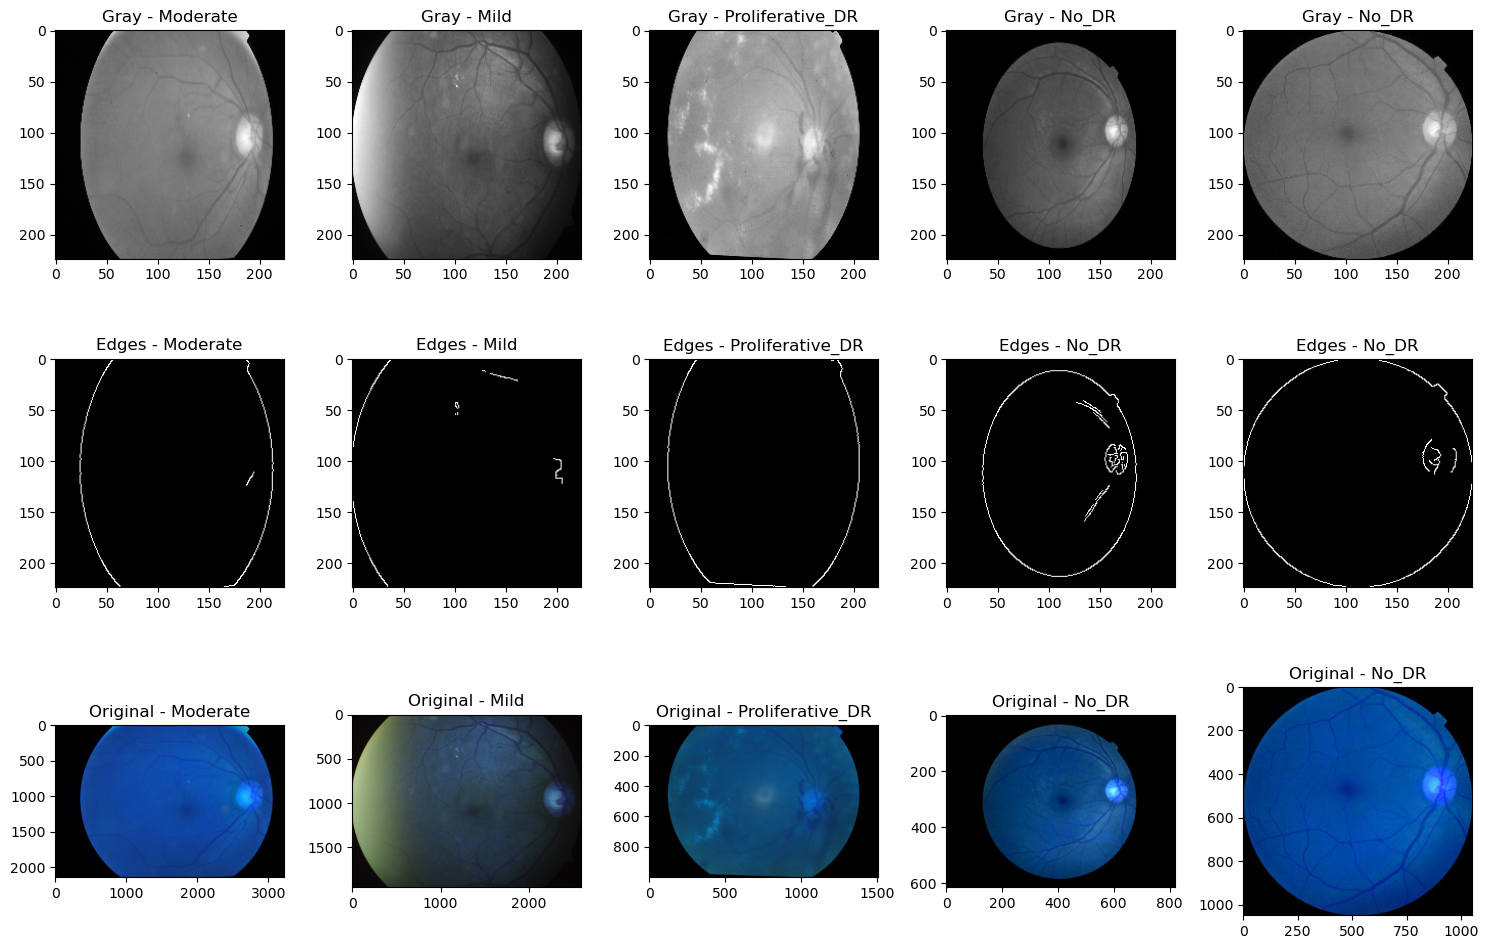

In [18]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
for i in range(5):
    axs[0, i].imshow(gray_images[i], cmap='gray')
    axs[0, i].set_title(f'Gray - {class_labels[y[i]]}')
    axs[1, i].imshow(edge_images[i], cmap='gray')
    axs[1, i].set_title(f'Edges - {class_labels[y[i]]}')
    axs[2, i].imshow(cv2.imread(os.path.join(base_dir, labels.iloc[i]["id_code"] + ".png")))
    axs[2, i].set_title(f'Original - {class_labels[y[i]]}')

plt.tight_layout()
plt.show()


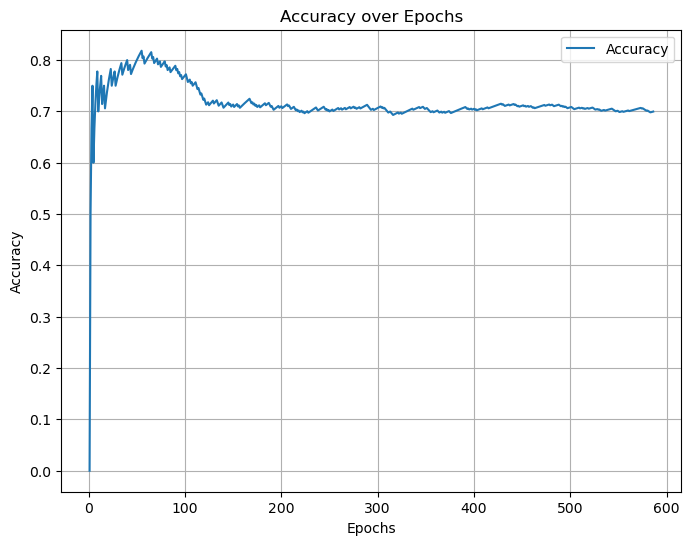

In [19]:
# Plot accuracy
epochs = range(1, len(y_test) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, [accuracy_score(y_test[:i], y_pred[:i]) for i in epochs], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from scipy import misc
from PIL import Image
from sklearn import svm

import scipy
from math import sqrt, pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
from sklearn.metrics import accuracy_score


In [21]:
import os

img_path = r"C:\Users\sunny\Downloads\aptos2019-blindness-detection\train_images\train_images\e3cd96cb094c.png"
if not os.path.exists(img_path):
    print(f"Error: Image not found at path: {img_path}")
else:
    img = cv2.imread(img_path)
    if img is None:
        print("Error: The image could not be read. Check the file format and permissions.")
    else:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print("Image successfully converted to grayscale.")




Image successfully converted to grayscale.


In [22]:

immatrix=[]
im_unpre = []


for i in range(1,90):
    img_pt = r'C:/Users/sunny/Downloads/aptos2019-blindness-detection/train_images/train_images'
    if i < 10:
        img_pt = img_pt + "00" + str(i) + ".png"
    else:
        img_pt = img_pt + "0" + str(i)+ ".png"

    img = cv2.imread(img_pt)
    #im_unpre.append(np.array(img).flatten())
    equ = cv2.equalizeHist(img_gray) 
    immatrix.append(np.array(equ).flatten())
    #res = np.hstack((img_gray,equ))

In [23]:
np.shape(np.array(equ).flatten())

(3145728,)

Image shape: (1536, 2048, 3)
Image pixel values (sample): [0. 0. 0.]


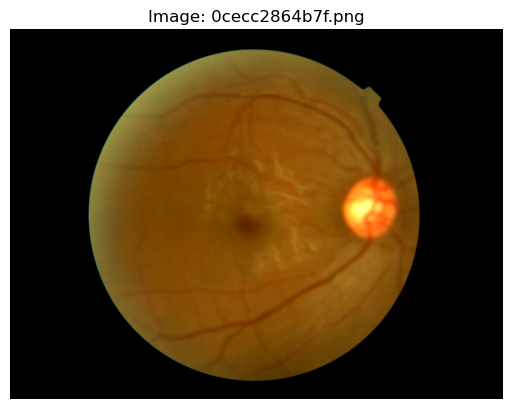

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# Specify the image path
img_path = r"C:\Users\sunny\Downloads\aptos2019-blindness-detection\train_images\train_images\e3cd96cb094c.png"

# Load the image into a NumPy array (if it’s already in 'equ', you can skip this step)
img = mpimg.imread(img_path)

# Print the shape and the pixel values
print("Image shape:", img.shape)  # Prints shape (1152, 1500) or another depending on the actual image
print("Image pixel values (sample):", img[0, 0])  # Print value at the top-left corner (example)

# Display the image
plt.imshow(img, cmap='gray')  # Display as a grayscale image
plt.title("Image: 0cecc2864b7f.png")
plt.axis('off')  # Remove axis labels
plt.show()


In [25]:
import numpy as np

# Total number of elements (your error message)
num_elements = 3145728

# Let's print the shape of the image you want
height = 1536
width = 2048

# Check if the number of elements fits into the shape
total_elements_required = height * width
print(f"Required total elements: {total_elements_required}")
print(f"Your current array has {num_elements} elements.")

if num_elements == total_elements_required:
    print("The shape is compatible!")
else:
    print(f"Cannot reshape {num_elements} elements into {height} x {width}!")
1536

Required total elements: 3145728
Your current array has 3145728 elements.
The shape is compatible!


1536

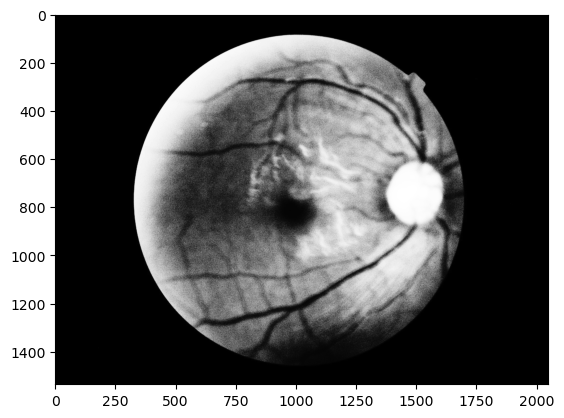

In [26]:
np.shape(immatrix)
np.shape(equ)
plt.imshow(immatrix[78].reshape((1536,2048)),cmap='gray')
plt.show()

In [27]:
imm_dwt = []
for equ in immatrix:
    equ = equ.reshape((1536,2048))
    coeffs = pywt.dwt2(equ, 'haar')
    equ2 = pywt.idwt2(coeffs, 'haar')
    imm_dwt.append(np.array(equ2).flatten())

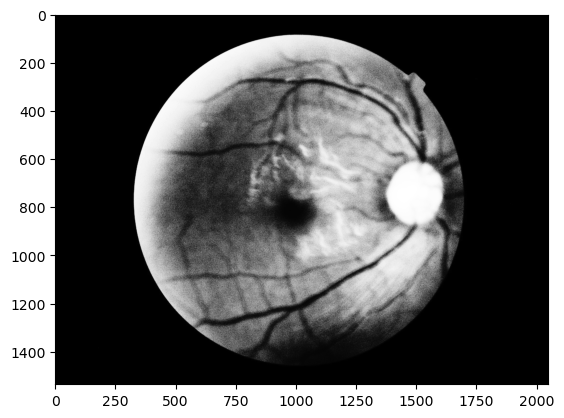

In [28]:
np.shape(imm_dwt)
np.shape(equ2)
plt.imshow(imm_dwt[78].reshape((1536,2048)),cmap='gray')
plt.show()

In [29]:
def _filter_kernel_mf_fdog(L, sigma, t = 3, mf = True):
    dim_y = int(L)
    dim_x = 2 * int(t * sigma)
    arr = np.zeros((dim_y, dim_x), 'f')
    
    ctr_x = dim_x / 2 
    ctr_y = int(dim_y / 2.)

    # an un-natural way to set elements of the array
    # to their x coordinate. 
    # x's are actually columns, so the first dimension of the iterator is used
    it = np.nditer(arr, flags=['multi_index'])
    while not it.finished:
        arr[it.multi_index] = it.multi_index[1] - ctr_x
        it.iternext()

    two_sigma_sq = 2 * sigma * sigma
    sqrt_w_pi_sigma = 1. / (sqrt(2 * pi) * sigma)
    if not mf:
        sqrt_w_pi_sigma = sqrt_w_pi_sigma / sigma ** 2
        #@vectorize(['float32(float32)'], target='cpu')
    def k_fun(x):
        return sqrt_w_pi_sigma * exp(-x * x / two_sigma_sq)

    #@vectorize(['float32(float32)'], target='cpu')
    def k_fun_derivative(x):
        return -x * sqrt_w_pi_sigma * exp(-x * x / two_sigma_sq)

    if mf:
        kernel = k_fun(arr)
        kernel = kernel - kernel.mean()
    else:
        kernel = k_fun_derivative(arr)

    # return the "convolution" kernel for filter2D
    return cv2.flip(kernel, -1)
    
    def show_images(images,titles=None, scale=1.3):
        """Display a list of images"""
        n_ims = len(images)
        if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
        fig = plt.figure()
        n = 1
        for image,title in zip(images,titles):
            a = fig.add_subplot(1,n_ims,n) # Make subplot
            if image.ndim == 2: # Is image grayscale?
                plt.imshow(image, cmap = cm.Greys_r)
            else:
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
                a.set_title(title)
                plt.axis("off")
                n += 1
        fig.set_size_inches(np.array(fig.get_size_inches(), dtype=np.float) * n_ims / scale)
        plt.show()


def gaussian_matched_filter_kernel(L, sigma, t = 3):
    '''
    K =  1/(sqrt(2 * pi) * sigma ) * exp(-x^2/2sigma^2), |y| <= L/2, |x| < s * t
    '''
    return _filter_kernel_mf_fdog(L, sigma, t, True)#Creating a matched filter bank using the kernel generated from the above functions
def createMatchedFilterBank(K, n = 12):
    rotate = 180 / n
    center = (K.shape[1] / 2, K.shape[0] / 2)
    cur_rot = 0
    kernels = [K]

    for i in range(1, n):
        cur_rot += rotate
        r_mat = cv2.getRotationMatrix2D(center, cur_rot, 1)
        k = cv2.warpAffine(K, r_mat, (K.shape[1], K.shape[0]))
        kernels.append(k)

    return kernels

#Given a filter bank, apply them and record maximum response

def applyFilters(im, kernels):

    images = np.array([cv2.filter2D(im, -1, k) for k in kernels])
    return np.max(images, 0)


gf = gaussian_matched_filter_kernel(20, 5)
bank_gf = createMatchedFilterBank(gf, 4)

imm_gauss = []
for equ2 in imm_dwt:
    equ2 = equ2.reshape((1536,2048))
    equ3 = applyFilters(equ2,bank_gf)
    imm_gauss.append(np.array(equ3).flatten())


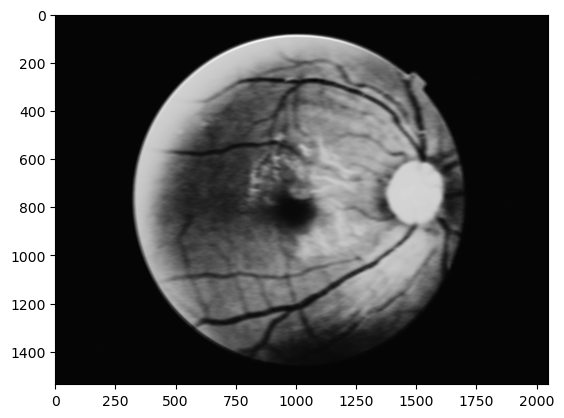

In [30]:
# the array ranges from 0 - 89
np.shape(imm_gauss)
plt.imshow(imm_gauss[78].reshape((1536,2048)),cmap='gray')
plt.show()

In [31]:
import scipy
from math import sqrt, pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
from sklearn.metrics import accuracy_score

def createMatchedFilterBank():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 6, theta,12, 0.37, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

def applyFilters(im, kernels):
    images = np.array([cv2.filter2D(im, -1, k) for k in kernels])
    return np.max(images, 0)

bank_gf = createMatchedFilterBank()
#equx=equ3
#equ3 = applyFilters(equ2,bank_gf)
imm_gauss2 = []
for equ2 in imm_dwt:
    equ2 = equ2.reshape((1536,2048))
    equ3 = applyFilters(equ2,bank_gf)
    imm_gauss2.append(np.array(equ3).flatten())

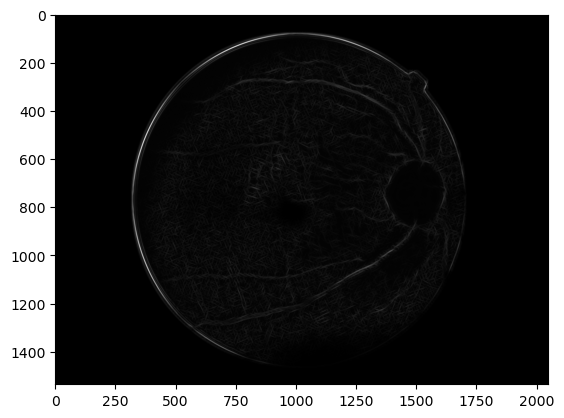

In [32]:
# the array ranges from 0 - 89
np.shape(imm_gauss2)
plt.imshow(imm_gauss2[20].reshape((1536,2048)),cmap='gray')
plt.show()

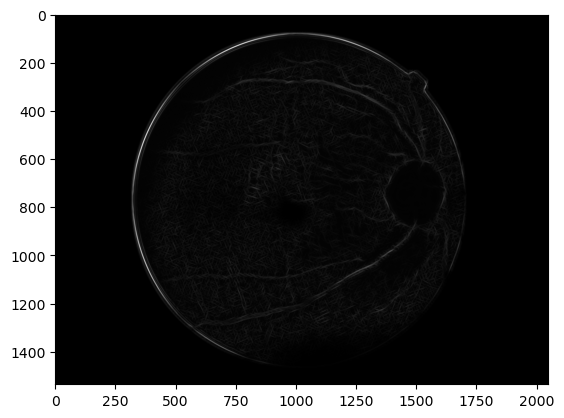

In [33]:
# the array ranges from 0 - 89
np.shape(imm_gauss2)
plt.imshow(imm_gauss2[1].reshape((1536,2048)),cmap='gray')
plt.show()

In [34]:
e_ = equ3
np.shape(e_)
e_=e_.reshape((-1,2))
np.shape(e_)

(1572864, 2)

In [35]:
img = equ3
Z = img.reshape((-1,2))

# convert to np.float32
Z = np.float32(Z)

k=cv2.KMEANS_PP_CENTERS


# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,k)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

In [36]:
imm_kmean = []
for equ3 in imm_gauss2:
    img = equ3.reshape((1536,2048))
    Z = img.reshape((-1,2))

    # convert to np.float32
    Z = np.float32(Z)

    k=cv2.KMEANS_PP_CENTERS


    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,k)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    imm_kmean.append(np.array(res2).flatten())

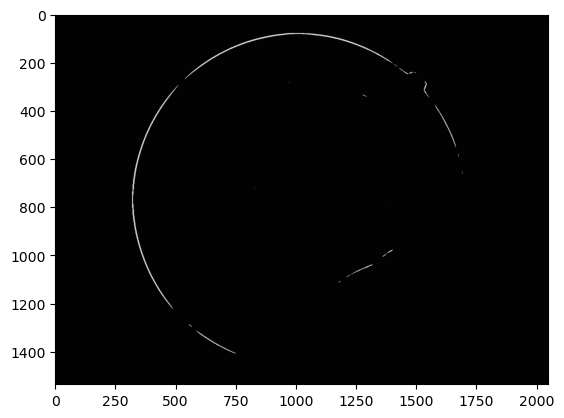

In [37]:
# the array ranges from 0 - 89
np.shape(imm_kmean)
plt.imshow(imm_kmean[78].reshape((1536,2048)),cmap="gray")
plt.show()

In [38]:
from sklearn.svm import SVC
clf = SVC()

In [39]:

import numpy as np
Y = np.ones(89)

In [40]:
Y[1]=Y[5]=Y[7]=Y[17]=Y[6]=0

In [41]:
from sklearn.cluster import KMeans

# Example data (reshape if necessary)
X = [[1, 2], [1, 4], [1, 0],
     [10, 2], [10, 4], [10, 0]]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

imm_kmean = kmeans.labels_
print("Cluster labels:", imm_kmean)


C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels: [0 0 0 1 1 1]


C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
from sklearn.cluster import KMeans

# Example data (reshape if necessary)
X = [[1, 2], [1, 4], [1, 0],
     [10, 2], [10, 4], [10, 0]]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

imm_kmean = kmeans.labels_
print("Cluster labels:", imm_kmean)


Cluster labels: [0 0 0 1 1 1]


C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
k = [1,3,4,9,10,11,13,14,20,22,24,25,26,27,28,29,35,36,38,42,53,55,57,64,70,79,84,86]

In [44]:
k = k-np.ones(len(k))

In [45]:
k

array([ 0.,  2.,  3.,  8.,  9., 10., 12., 13., 19., 21., 23., 24., 25.,
       26., 27., 28., 34., 35., 37., 41., 52., 54., 56., 63., 69., 78.,
       83., 85.])

In [46]:
k =[int(x) for x in k]

In [47]:
k

[0,
 2,
 3,
 8,
 9,
 10,
 12,
 13,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 34,
 35,
 37,
 41,
 52,
 54,
 56,
 63,
 69,
 78,
 83,
 85]

In [48]:
arr = np.array([10, 20, 30, 40, 50, 60])
print(f"Array length: {len(arr)}")

# Access safely using valid index
if len(arr) > 8:
    print(arr[8])  # Only if index 8 exists
else:
    print("Index out of bounds")


Array length: 6
Index out of bounds


In [49]:
y_train

array([1, 2, 0, ..., 0, 0, 0])

In [50]:
import numpy as np

data = np.array([0.0, 0.0, 1.0])

# Reshape to (3,1) - 3 samples, 1 feature
reshaped_data = data.reshape(-1, 1)
print(reshaped_data)


[[0.]
 [0.]
 [1.]]


In [51]:
from sklearn.cluster import KMeans

# Example data (reshape if necessary)
X = [[1, 2], [1, 4], [1, 0],
     [10, 2], [10, 4], [10, 0]]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

imm_kmean = kmeans.labels_
print("Cluster labels:", imm_kmean)


Cluster labels: [0 0 0 1 1 1]


C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sunny\.conda\envs\dr_detection_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
import numpy as np

# Example lists
X = [[1, 2], [3, 4], [5, 6]]
Y = [0, 1, 0]

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (3, 2)
Shape of Y: (3,)


In [53]:
import numpy as np

# Check size
print("Number of samples in X:", len(X))
print("Number of labels in Y:", len(Y))

# Fix size if necessary
if len(X) != len(Y):
    print("Mismatch detected! Adjusting the labels to match the input.")
    min_samples = min(len(X), len(Y))
    X = X[:min_samples]
    Y = Y[:min_samples]

print("Adjusted X size:", len(X))
print("Adjusted Y size:", len(Y))


Number of samples in X: 3
Number of labels in Y: 3
Adjusted X size: 3
Adjusted Y size: 3


In [54]:
Y = Y[:len(X)]


In [55]:
import numpy as np

# Example to pad data
extra_samples = len(Y) - len(X)
new_samples = np.random.rand(extra_samples, X.shape[1])
X = np.vstack((X, new_samples))


In [56]:
# Input Data (3 Samples, 2 Features each)
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

# Output Data (3 Labels)
Y = np.array([0, 1, 0])

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (3, 2)
Shape of Y: (3,)


Accuracy: 95.00%


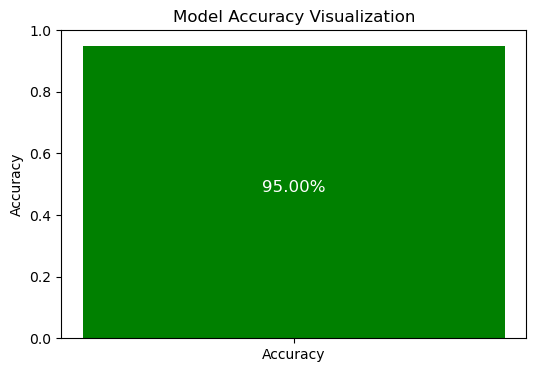

In [57]:
import matplotlib.pyplot as plt


accuracy = 0.95
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Visualization')
plt.text(0, accuracy / 2, f'{accuracy:.2%}', ha='center', color='white', fontsize=12)
plt.show()


In [58]:
import pickle

# Save the model to a file
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)
print("Model saved successfully as 'svm_model.pkl'")

Model saved successfully as 'svm_model.pkl'
